In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [2]:
%cd /content/drive/My\ Drive/Colab\ Notebooks/data 
# change directory
%pwd  # Ben neredeyim komutu
!ls    # İçerisinde ne var 

/content/drive/My Drive/Colab Notebooks/data
states_all.csv	StudentsPerformance.csv


In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import seaborn as sns
import scipy.stats as stats
from scipy.stats.mstats import winsorize
import warnings

warnings.filterwarnings('ignore')
sns.set(style="whitegrid")

plt.rcParams['figure.dpi'] = 100
plt.rcParams['figure.figsize'] = (8,5.5)

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [6]:
data = pd.read_csv("StudentsPerformance.csv", index_col=0)
data.head()

,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
gender,,,,,,,
female,group B,bachelor's degree,standard,none,72,72,74
female,group C,some college,standard,completed,69,90,88
female,group B,master's degree,standard,none,90,95,93
male,group A,associate's degree,free/reduced,none,47,57,44
male,group C,some college,standard,none,76,78,75


In [9]:
data.groupby('gender').mean() # erkekler matematikte kızlar sözelde iyi ortalama almaktadır . :D

,math score,reading score,writing score
gender,,,
female,63.633205,72.608108,72.467181
male,68.728216,65.473029,63.311203


In [7]:
data.groupby('race/ethnicity').mean() # D Grubu genel olarak yüksek notlar almış

,math score,reading score,writing score
race/ethnicity,,,
group A,61.629213,64.674157,62.674157
group B,63.452632,67.352632,65.600000
group C,64.463950,69.103448,67.827586
group D,67.362595,70.030534,70.145038
group E,73.821429,73.028571,71.407143


In [8]:
data.groupby('parental level of education').mean() # Çıplak gözle masters degree ailelerin daha başarılı çocukları var

,math score,reading score,writing score
parental level of education,,,
associate's degree,67.882883,70.927928,69.896396
bachelor's degree,69.389831,73.000000,73.381356
high school,62.137755,64.704082,62.448980
master's degree,69.745763,75.372881,75.677966
some college,67.128319,69.460177,68.840708
some high school,63.497207,66.938547,64.888268


In [10]:
data.groupby('lunch').mean() # ilk olarak standartların bir ezici üstünlüğü var

,math score,reading score,writing score
lunch,,,
free/reduced,58.921127,64.653521,63.022535
standard,70.034109,71.654264,70.823256


findfont: Font family ['arial'] not found. Falling back to DejaVu Sans.


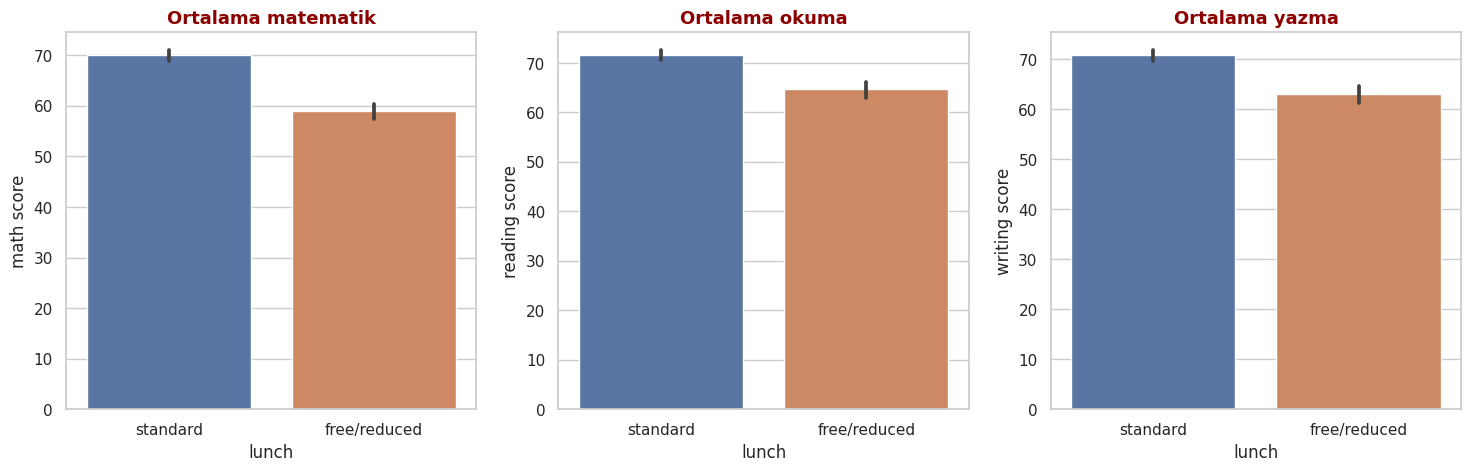

In [14]:
baslik_font = {'family': 'arial', 'color': 'darkred','weight': 'bold','size': 13 } # Burda da görsellik yakalamaya çalıştım ama correlasyon yapabilirmiydim emin değilim ?
eksen_font  = {'family': 'arial', 'color': 'darkblue','weight': 'bold','size': 10 }

plt.figure(figsize=(18,5))

plt.subplot(1,3,1)
sns.barplot(data['lunch'], data["math score"])
plt.title("Ortalama matematik", fontdict = baslik_font)

plt.subplot(1,3,2)
sns.barplot(data['lunch'], data["reading score"])
plt.title("Ortalama okuma", fontdict = baslik_font)

plt.subplot(1,3,3)

sns.barplot(data['lunch'], data["writing score"])
plt.title("Ortalama yazma", fontdict = baslik_font)

plt.show()

In [16]:
data.groupby('test preparation course').mean() # yine completed lar kendi özelinde hep yüksek

,math score,reading score,writing score
test preparation course,,,
completed,69.695531,73.893855,74.418994
none,64.077882,66.534268,64.504673


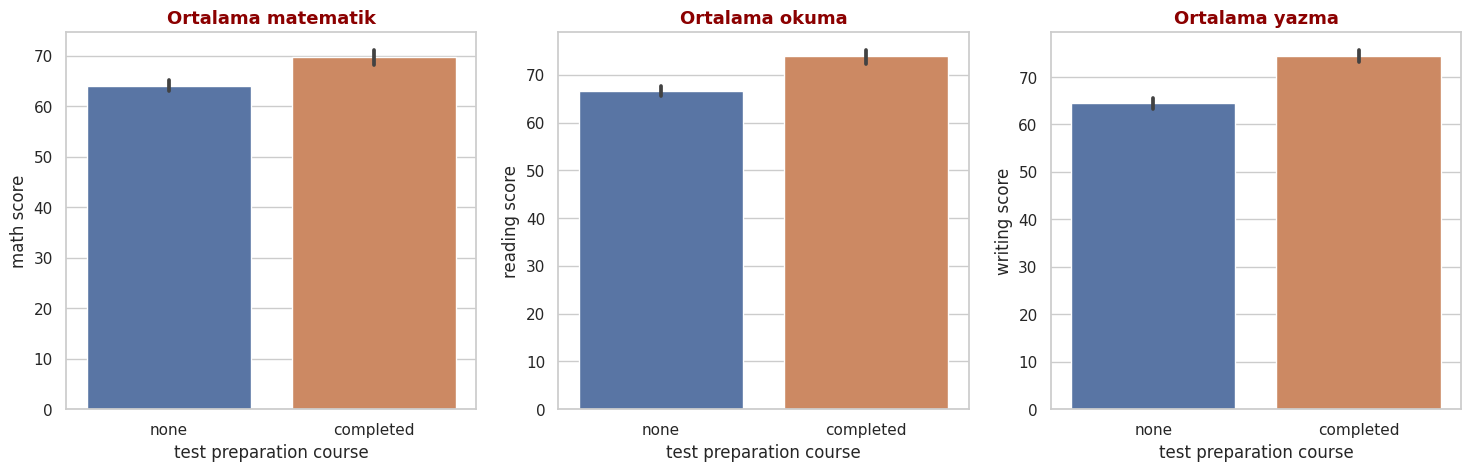

In [17]:
plt.figure(figsize=(18,5)) # Görsel proof

plt.subplot(1,3,1)
sns.barplot(data['test preparation course'], data["math score"])
plt.title("Ortalama matematik", fontdict = baslik_font)

plt.subplot(1,3,2)
sns.barplot(data['test preparation course'], data["reading score"])
plt.title("Ortalama okuma", fontdict = baslik_font)

plt.subplot(1,3,3)

sns.barplot(data['test preparation course'], data["writing score"])
plt.title("Ortalama yazma", fontdict = baslik_font)

plt.show()

In [18]:
data.corr() # sayısal sözel farkını kanıtladık okuma bilen yazma da biliyor :D

,math score,reading score,writing score
math score,1.000000,0.817580,0.802642
reading score,0.817580,1.000000,0.954598
writing score,0.802642,0.954598,1.000000
